# Integración de datos MIMIC- Waveform database
## 1) Verificar Prerequisitos
### Python
SciDB-Py requires Python 2.6-2.7 or 3.3

In [42]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [43]:
import pprint

pp=pprint.PrettyPrinter(indent=4)

### NumPy
tested with version 1.9 (1.13.1)

In [44]:
import numpy as np
np.__version__

'1.15.4'

### Requests
tested with version 2.7 (2.18.1) Required for using the Shim interface to SciDB.

### Pandas (optional)
tested with version 0.15. (0.20.3) Required only for importing/exporting SciDB arrays as Pandas Dataframe objects.

In [45]:
import pandas as pd
pd.__version__

'0.22.0'

### SciPy (optional)
tested with versions 0.10-0.12. (0.19.0) Required only for importing/exporting SciDB arrays as SciPy sparse matrices.

In [46]:
import scipy
scipy.__version__

'1.1.0'

## 4) Importar WFDB para conectarse a physionet

In [47]:
import wfdb
wfdb.__version__

'2.2.0'

In [48]:
record_list= wfdb.get_record_list('mimic3wdb/matched')

In [49]:
len(record_list)


10282

In [50]:
print(record_list[:10])
print("Total records")
print(len(record_list))

['p00/p000020/', 'p00/p000030/', 'p00/p000033/', 'p00/p000052/', 'p00/p000079/', 'p00/p000085/', 'p00/p000107/', 'p00/p000109/', 'p00/p000123/', 'p00/p000124/']
Total records
10282


In [51]:
patient_ids=list(map(lambda x: int(x[x.rfind('p')+1:x.rfind('/')]), record_list ))

In [11]:
files=list(filter( lambda x : x.startswith('p') and not x.endswith('n'),wfdb.get_record_list('mimic3wdb/matched/'+record_list[6])))

In [13]:
files

['p000107-2121-11-30-20-03',
 'p000107-2122-05-14-21-01',
 'p000107-2123-07-26-03-10',
 'p000107-2124-01-10-05-53']

In [14]:
record_list[6]

'p00/p000107/'

In [15]:
files[0]

'p000107-2121-11-30-20-03'

In [16]:
subject_id = patient_ids[6]
print(subject_id)

107


In [17]:
record2 = wfdb.rdrecord(files[0], pb_dir='mimic3wdb/matched/'+record_list[6], channel_names=['II'])

In [18]:
record3 = wfdb.rdrecord(files[1], pb_dir='mimic3wdb/matched/'+record_list[6])

In [19]:
record3

In [20]:
record2

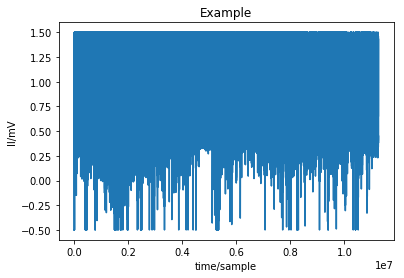

In [21]:
wfdb.plot_wfdb(record=record2, title="Example")


In [22]:
pp.pprint(record2.__dict__)


{   'adc_gain': None,
    'adc_res': None,
    'adc_zero': None,
    'base_counter': None,
    'base_date': datetime.date(2121, 11, 30),
    'base_datetime': datetime.datetime(2121, 11, 30, 20, 3, 22, 826000),
    'base_time': datetime.time(20, 3, 22, 826000),
    'baseline': None,
    'block_size': None,
    'byte_offset': None,
    'checksum': None,
    'comments': ['Location: micu'],
    'counter_freq': None,
    'd_signal': None,
    'e_d_signal': None,
    'e_p_signal': None,
    'file_name': None,
    'fmt': ['16'],
    'fs': 125,
    'init_value': None,
    'layout': 'variable',
    'n_sig': 1,
    'p_signal': array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.62988281],
       [0.64990234],
       [0.65478516]]),
    'record_name': 'p000107-2121-11-30-20-03',
    'samps_per_frame': None,
    'sig_len': 11259250,
    'sig_name': ['II'],
    'sig_segments': None,
    'skew': None,
    'units': ['mV']}


In [23]:
pp.pprint(record3.__dict__)


{   'adc_gain': None,
    'adc_res': None,
    'adc_zero': None,
    'base_counter': None,
    'base_date': datetime.date(2122, 5, 14),
    'base_datetime': datetime.datetime(2122, 5, 14, 21, 1, 58),
    'base_time': datetime.time(21, 1, 58),
    'baseline': None,
    'block_size': None,
    'byte_offset': None,
    'checksum': None,
    'comments': ['Location: micu'],
    'counter_freq': None,
    'd_signal': None,
    'e_d_signal': None,
    'e_p_signal': None,
    'file_name': None,
    'fmt': ['80', '80', '80', '80', '80'],
    'fs': 125,
    'init_value': None,
    'layout': 'variable',
    'n_sig': 5,
    'p_signal': array([[       nan,        nan, 0.50196078,        nan,        nan],
       [       nan,        nan, 0.50196078,        nan,        nan],
       [       nan,        nan, 0.50196078,        nan,        nan],
       ...,
       [       nan,        nan, 0.50196078,        nan,        nan],
       [       nan,        nan, 0.50196078,        nan,        nan],
       [    

In [29]:
record3.p_signal[:,0].shape

(1315,)

In [26]:
import wfdb.processing as processing


In [15]:
import matplotlib.pyplot as plt


In [28]:
type(record2.p_signal.shape)


tuple

Normaliza la señal y le quita los valores en null

In [28]:
peaks_inds=processing.gqrs_detect(sig=record2.p_signal[:,0], fs=record2.fs)


In [26]:
np.isnan(peaks_inds)

NameError: name 'peaks_ind' is not defined

In [35]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()


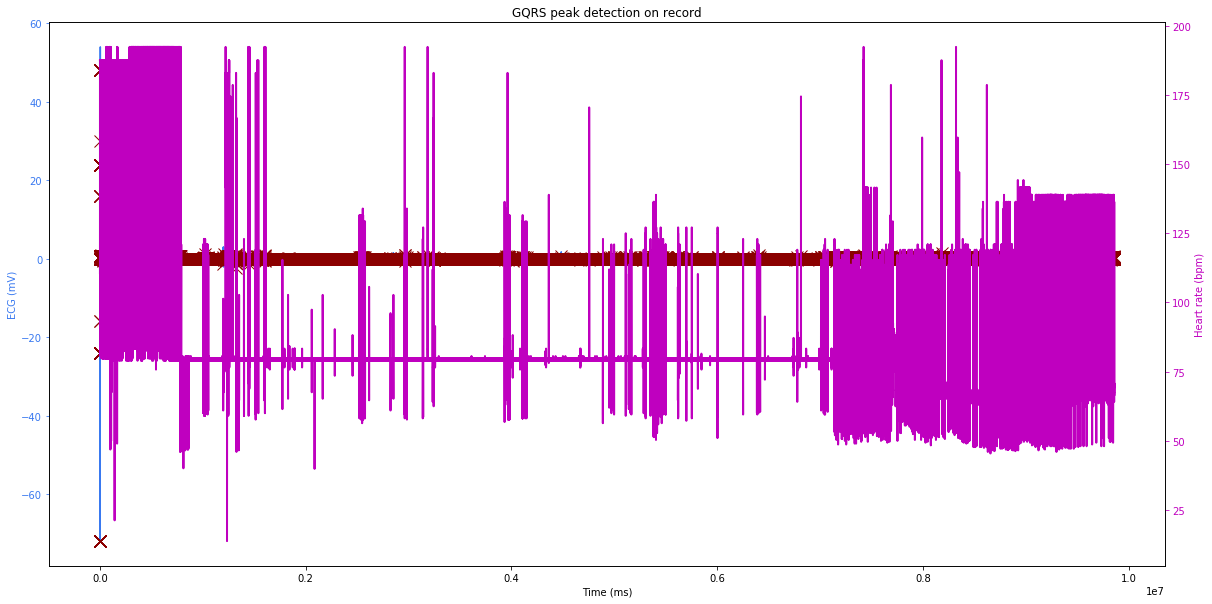

In [36]:
peaks_hr(sig=record2.p_signal, peak_inds=peaks_ind, fs=record2.fs,
        title="GQRS peak detection on record")

Cambiar los guiones "-" por raya al piso "_" porque por algun motivo SciDB tiene problemas con estos caracteres
Si el arreglo sin valores nulos no queda vacio lo sube al SciDB

# Conectar con MIMIC


In [52]:
## Cargar datos de pacientes, admisiones y icu_stays
patients = pd.read_csv('mimic/PATIENTS.csv')
admissions = pd.read_csv('mimic/ADMISSIONS.csv')
icu_stays = pd.read_csv('mimic/ICUSTAYS.csv')

In [53]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [54]:
admissions[admissions.SUBJECT_ID==124]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
128,167,124,112906,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1
129,168,124,134369,2165-05-21 21:02:00,2165-06-06 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,CLAUDICATION,0,1
130,169,124,138376,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
210,166,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CVA,0,1


In [55]:
admissions[admissions.SUBJECT_ID==124].DEATHTIME.isna()

128     True
129     True
130    False
210     True
Name: DEATHTIME, dtype: bool

In [56]:
print(len(admissions))
print(len(admissions[admissions.DEATHTIME.isna()==False])) #how many died

58976
5854


In [57]:
#Convertir a fechas
admissions['ADMITTIME']=pd.to_datetime(admissions['ADMITTIME'])
admissions['DISCHTIME']=pd.to_datetime(admissions['DISCHTIME'])
admissions['DEATHTIME']=pd.to_datetime(admissions['DEATHTIME'])
#Convertir a fechas
icu_stays['OUTTIME']=pd.to_datetime(icu_stays['OUTTIME'])
icu_stays['INTIME']=pd.to_datetime(icu_stays['INTIME'])

Patients with records are in list patient_ids
We need to find the stays for these patients, and obtain their death time or discharge time
The want to calculate the time from icu release to death or discharge
Then, we will find a rule to state whether died is true or false  (example: if death time is before 24 hours after the release)

In [58]:
icu_stays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


We need in_time to match with the admission, and outtime to obtain the difference with dischtime and deathtime

In [59]:
#Filter only patients in record list
icu_stays = icu_stays[icu_stays.SUBJECT_ID.isin(patient_ids)]
admissions = admissions[admissions.SUBJECT_ID.isin(patient_ids)]
admissions = admissions[['SUBJECT_ID', 'ADMITTIME','DISCHTIME', 'DEATHTIME']]
patient_data = icu_stays[['SUBJECT_ID', 'ICUSTAY_ID', 'INTIME', 'OUTTIME']]

In [60]:
#merge based on subject_id
all_data = patient_data.merge(admissions)
print(len(all_data))
print(len(all_data[all_data.DEATHTIME.isna()==False])) # how many died

50533
2957


In [61]:
all_data.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,ADMITTIME,DISCHTIME,DEATHTIME
0,271,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2120-08-07 18:56:00,2120-08-20 16:00:00,NaT
1,279,204407,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-13 19:19:00,2164-06-19 17:15:00,NaT
2,283,231490,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-08-12 22:02:00,2166-09-12 14:41:00,NaT
3,283,231490,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-10-02 15:36:00,2166-10-07 13:21:00,NaT
4,283,280531,2166-10-02 15:38:43,2166-10-07 13:22:00,2166-08-12 22:02:00,2166-09-12 14:41:00,NaT


Filter all data based on admitttime, intime and outtime

In [62]:
all_data =all_data[all_data.INTIME>=all_data.ADMITTIME]
all_data =all_data[(all_data.INTIME <= all_data.DISCHTIME) | (all_data.INTIME <= all_data.DEATHTIME)]

In [63]:
all_data.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,ADMITTIME,DISCHTIME,DEATHTIME
0,271,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2120-08-07 18:56:00,2120-08-20 16:00:00,NaT
1,279,204407,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-13 19:19:00,2164-06-19 17:15:00,NaT
2,283,231490,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-08-12 22:02:00,2166-09-12 14:41:00,NaT
5,283,280531,2166-10-02 15:38:43,2166-10-07 13:22:00,2166-10-02 15:36:00,2166-10-07 13:21:00,NaT
6,292,222505,2103-09-27 18:29:30,2103-09-28 15:44:31,2103-09-27 18:28:00,2103-09-28 15:44:00,2103-09-28 15:44:00


Make column with time from outtime to death  (if patient died)

In [64]:
all_data['TIME_TO_DEATH']= (all_data.DEATHTIME - all_data.OUTTIME)

In [65]:
all_data.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,ADMITTIME,DISCHTIME,DEATHTIME,TIME_TO_DEATH
0,271,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2120-08-07 18:56:00,2120-08-20 16:00:00,NaT,NaT
1,279,204407,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-13 19:19:00,2164-06-19 17:15:00,NaT,NaT
2,283,231490,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-08-12 22:02:00,2166-09-12 14:41:00,NaT,NaT
5,283,280531,2166-10-02 15:38:43,2166-10-07 13:22:00,2166-10-02 15:36:00,2166-10-07 13:21:00,NaT,NaT
6,292,222505,2103-09-27 18:29:30,2103-09-28 15:44:31,2103-09-27 18:28:00,2103-09-28 15:44:00,2103-09-28 15:44:00,-1 days +23:59:29


In [66]:
print(all_data.TIME_TO_DEATH.min())
print(all_data.TIME_TO_DEATH.max())

-31 days +00:00:00
149 days 07:59:37


Hypothesis:
149 days: one admission, several in and out from icu, died in the last one 
-31 days? 

In [67]:
#error data
all_data[all_data.TIME_TO_DEATH < '-2 days']
#delete if deathtime is before intime
all_data = all_data[(all_data.DEATHTIME>all_data.INTIME) | (all_data.DISCHTIME>all_data.INTIME)] #change filter deathtime or discharge

In [68]:
#Weird data
all_data[all_data.TIME_TO_DEATH < '-3 days']

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,ADMITTIME,DISCHTIME,DEATHTIME,TIME_TO_DEATH
5284,4331,265287,2142-11-02 11:23:09,2142-11-11 02:42:51,2142-11-02 11:22:00,2142-11-07 01:30:00,2142-11-07 01:30:00,-5 days +22:47:09
7451,6800,265008,2177-12-30 01:50:00,2178-01-01 19:41:00,2177-12-29 21:33:00,2178-01-01 19:41:00,2177-12-01 19:41:00,-31 days +00:00:00
10225,11347,263047,2164-03-09 10:59:59,2164-03-15 20:45:57,2164-03-09 10:56:00,2164-03-15 15:30:00,2164-03-08 15:30:00,-8 days +18:44:03


In [69]:
#mean duration of signal
all_data['SIGNAL_DURATION'] = all_data.OUTTIME - all_data.INTIME
print(np.mean(all_data['SIGNAL_DURATION']))
print(np.max(all_data['SIGNAL_DURATION']))
print(np.min(all_data['SIGNAL_DURATION']))

print(len(all_data))
print(len(all_data[all_data.DEATHTIME.isna()==False])) # how many died

4 days 11:25:16.159566
108 days 14:48:07
0 days 00:00:12
17159
1677


In [70]:
all_data = all_data[all_data.SIGNAL_DURATION > pd.Timedelta('5hour')]
print(np.mean(all_data['SIGNAL_DURATION']))
print(np.max(all_data['SIGNAL_DURATION']))
print(np.min(all_data['SIGNAL_DURATION']))

print(len(all_data))
print(len(all_data[all_data.DEATHTIME.isna()==False])) # how many died

4 days 11:54:50.801861
108 days 14:48:07
0 days 05:07:00
17079
1664


In [71]:
signal_data = pd.read_csv('signal_data.csv', header=[0], index_col=[0])
signal_data['start']=pd.to_datetime(signal_data['start'])
signal_data.head()

,file,Patient_ID,start,length
0,p000020-2183-04-28-17-47,20,2183-04-30 16:00:00,9862593
1,p000030-2172-10-16-12-22,30,2172-10-17 10:00:00,450000
2,p000033-2116-12-24-12-35,33,2116-12-25 23:00:00,10102500
3,p000033-2116-12-25-13-11,33,2116-12-26 00:00:00,390219
4,p000052-2191-01-10-02-21,52,2191-01-10 23:00:00,3886370


In [72]:
signal_data['f_signal_duration']=signal_data['length']/(125*3600)
signal_data.head()

,file,Patient_ID,start,length,f_signal_duration
0,p000020-2183-04-28-17-47,20,2183-04-30 16:00:00,9862593,21.916873
1,p000030-2172-10-16-12-22,30,2172-10-17 10:00:00,450000,1.000000
2,p000033-2116-12-24-12-35,33,2116-12-25 23:00:00,10102500,22.450000
3,p000033-2116-12-25-13-11,33,2116-12-26 00:00:00,390219,0.867153
4,p000052-2191-01-10-02-21,52,2191-01-10 23:00:00,3886370,8.636378


In [32]:
#join mimic and signal data based on subject_id and patient_id, start is between in time and out time
df = pd.merge(all_data, signal_data, how='inner', left_on='SUBJECT_ID', right_on='Patient_ID')
df = df[(df['start']>=df['INTIME']) & (df['start']<=df['OUTTIME'])]

In [75]:
#get signal > 5horas
df = df[df.f_signal_duration>=5]
df['end_of_signal'] = df['start']+pd.to_timedelta(df['f_signal_duration'], unit='h')
#time from end of signal to time of death
df['s_time_to_death']= pd.to_timedelta(df.DEATHTIME-df.end_of_signal).dt.total_seconds()//3600

#calculate start and end of download signal
#end: min between 4 hours before dying and end of signal
#start: 4 hours before end

df['download_end']=np.minimum(df.DEATHTIME-pd.Timedelta('1h'), df.end_of_signal)
df['download_start']=df['download_end']-pd.Timedelta('4h')

#convert to index --- time since signal start in seconds *125 to int
df['download_end_idx']=pd.to_timedelta(df['download_end']-df['start']).dt.total_seconds().astype(int)*125
df['download_start_idx']=pd.to_timedelta(df['download_start']-df['start']).dt.total_seconds().astype(int)*125

df = df[df.download_end_idx>0]
df = df[df.download_start_idx>0]

df.head()

,SUBJECT_ID,ICUSTAY_ID,INTIME,OUTTIME,ADMITTIME,DISCHTIME,DEATHTIME,TIME_TO_DEATH,SIGNAL_DURATION,file,Patient_ID,start,length,f_signal_duration,end_of_signal,s_time_to_death,download_end,download_start,download_end_idx,download_start_idx
0,279,204407,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-13 19:19:00,2164-06-19 17:15:00,NaT,NaT,4 days 01:34:45,p000279-2164-06-14-21-22,279,2164-06-15 19:00:00,43600234,96.889409,2164-06-19 19:53:21.872400,NaN,2164-06-19 19:53:21.872400,2164-06-19 15:53:21.872400,43600125,41800125
1,283,231490,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-08-12 22:02:00,2166-09-12 14:41:00,NaT,NaT,30 days 16:38:16,p000283-2166-09-11-13-16,283,2166-09-12 05:00:00,10620020,23.600044,2166-09-13 04:36:00.158400,NaN,2166-09-13 04:36:00.158400,2166-09-13 00:36:00.158400,10620000,8820000
6,301,288401,2189-11-11 12:12:33,2189-11-13 22:11:28,2189-11-10 16:39:00,2189-11-18 14:43:00,NaT,NaT,2 days 09:58:55,p000301-2189-11-11-09-04,301,2189-11-11 13:00:00,27443625,60.985833,2189-11-14 01:59:08.998800,NaN,2189-11-14 01:59:08.998800,2189-11-13 21:59:08.998800,27443500,25643500
10,302,249750,2133-03-29 02:34:11,2133-03-30 22:50:35,2133-03-29 02:33:00,2133-04-01 12:15:00,NaT,NaT,1 days 20:16:24,p000302-2133-03-29-12-27,302,2133-03-30 15:00:00,39202852,87.117449,2133-04-03 06:07:02.816400,NaN,2133-04-03 06:07:02.816400,2133-04-03 02:07:02.816400,39202750,37402750
11,308,283522,2135-09-04 12:54:00,2135-09-30 16:35:00,2135-09-02 23:07:00,2135-10-20 11:53:00,NaT,NaT,26 days 03:41:00,p000308-2135-09-04-12-57,308,2135-09-06 21:00:00,24725829,54.946287,2135-09-09 03:56:46.633200,NaN,2135-09-09 03:56:46.633200,2135-09-08 23:56:46.633200,24725750,22925750


(-200, 1000)

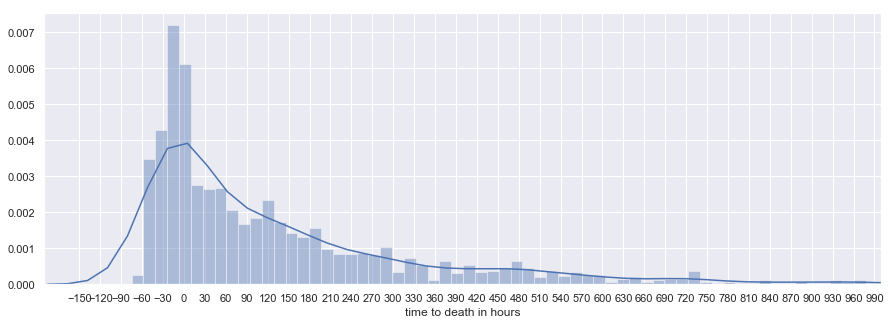

In [76]:
import seaborn as sns
died_data = df[pd.notna(df.DEATHTIME)]
sns.set(rc={'figure.figsize':(15, 5)})

ax= sns.distplot(died_data.s_time_to_death, axlabel='time to death in hours', bins=200)
ax.xaxis.set_ticks(np.arange(-150, 1000, 30))
ax.set_xlim(-200,1000)

In [77]:
len(died_data[(died_data.s_time_to_death > -30) & (died_data.s_time_to_death < 30)])

461

In [78]:
print(len(df))
print(len(df[df.DEATHTIME.isna()==False])) # how many died
print(len(df[df.DEATHTIME.isna()==True])) # how many not dead

11550
1543
10007


In [79]:
from  sklearn.utils import random as random

dead = died_data[(died_data.s_time_to_death > -30) & (died_data.s_time_to_death < 30)]

not_died = df[pd.isna(df.DEATHTIME)]
population_size = len(not_died)
sample_size= 3*len(dead) #TODO make multiple of how many died
not_died_keep_idx = random.sample_without_replacement(population_size, sample_size)

not_died = not_died.iloc[not_died_keep_idx]

In [81]:
#save data
dead.to_csv('died_data.csv')
not_died.to_csv('not_died_data.csv')

In [82]:
sample_size

1383

# MAKE FILES

In [ ]:
#old ----
#save into a pandas dataframe hrs and deathtime? 
df = pd.DataFrame()
list_hrs = []
list_deathtime = []
list_admission = []
date_time=pd.Timedelta(days=1)
#for each subject
for i, record in enumerate(record_list):
    files = list(filter( lambda x : x.startswith('p') and not x.endswith('n'),wfdb.get_record_list('mimic3wdb/matched/'+record)))
    #for each record (file)
    patient = patient_ids[i]
    for file in files:
        date = pd.to_datetime(file[8:])
        admission = admissions[(admissions.SUBJECT_ID==int(patient)) & (admissions.ADMITTIME <= date) & (admissions.DISCHTIME >= date) ]
        died = admission.DEATHTIME
        record_signal = wfdb.rdrecord(file, pb_dir='mimic3wdb/matched/'+record, channel_names=['II'])
        #record_signal = np.nan_to_num(record_signal)
        if record_signal is not None:
            peak_inds=processing.gqrs_detect(sig=np.nan_to_num(record_signal.p_signal[:,0]), fs=record_signal.fs)
            hrs = processing.compute_hr(sig_len=record_signal.p_signal.shape[0], qrs_inds=peak_inds, fs=record_signal.fs)
            list_hrs.append(hrs)
            list_admission.append(admission)